In [2]:
%load_ext autoreload
%autoreload 2

# project files
import sys

sys.path.append('..')
import helpers as helpers

# 3rd party
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Loads the data and split them into training and test subsets.
data, labels = helpers.load_ds_iris(sep_l=True, sep_w=True, pet_l=False, pet_w=False,
                              setosa=True, versicolor=True, virginica=False, addbias=True)

num_samples = data.shape[0] # 100

fraction_train = 0.8 # on prends 80% pour s'entrainer
np.random.seed(0) #initialise l'aléatoire

#initialise un tableau de 100 elements entre 0 et 100 au hasard
rinds = np.random.permutation(num_samples) #tableau de 1 ligne et 100 colonnes (vecteur ligne)

#on a pris data[rinds[0]], puis data[rinds[1]]...data[rinds[79]]
#il s'agit de tableau dans un tableau !

#print(rinds[:80]) #intersection entre toutes les lignes (donc ici la premiere et unique ligne) et les 80 
#premieres colonnes (revoir numpy mask)

data_train = data[rinds[:int(num_samples * fraction_train)]] #on prends 80 echantillons

#on a pris labels[rinds[0]], puis labels[rinds[1]]...labels[rinds[79]]
labels_train = labels[rinds[:int(num_samples * fraction_train)]]  


print(rinds[80:]) # tableau de 80 jusqu'a la fin

#on a pris data[rinds[79]], puis data[rinds[80]]...data[rinds[99]]
data_test = data[rinds[int(num_samples * fraction_train):]] 
labels_test = labels[rinds[int(num_samples * fraction_train):]]  



[25 37 81 46 39 65 58 12 88 70 87 36 21 83  9 96 67 64 47 44]


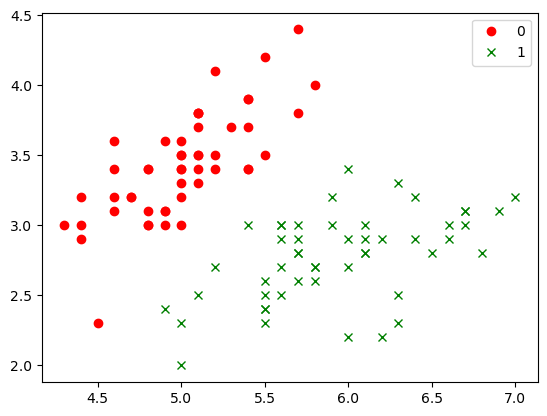

In [8]:
#print the data
fig = helpers.scatter2d_multiclass(data, labels)

#en fonction des 2 parameetres, on aura une classification differente
# rouge : espece iris setosa
# vert : espece iris virginica

#il s'agit d'un probleme de classification binaire
#il s'agit d'un graphe de 2 dimensionsphe en 3 dimensions projeté sur 2 dimensions

#le but est maintenant de lui associer un fonction de regression, et d'appliquer la fonction sismoid

A short introduction


This is called the sigmoid function! The sigmoid function is defined as:
$$\sigma(t)= \frac{1}{1+e^{-t}}$$




Let's try to code this function. You can use the numpy function `np.exp(x)` to take the exponential of a number.

probabilité conditionnelle

In logistic regression, the probability of a datapoint belonging to a class is found as:
$$P(y_i=1| x_i, w) = \frac{1}{1+e^{-x_i \cdot\ {w}}} $$



In [12]:
def sigmoid(t):
    """ Sigmoid function
    
    Args:
        t (np.array): Input data of shape (N, ) vecteur de N lignes
        
    Returns:
        np.array: Probabilites of shape (N, ), where each value is in [0, 1].
    """
    # rend un tableau de meme taille que t, avec des valeurs entre 0 et 1 
    # image de t par la fonction sigmoid
    return 1/(1 + np.exp(-t))

(20,)
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01]


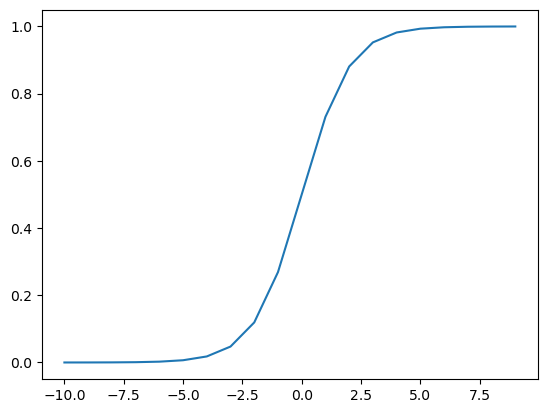

In [19]:
x = np.arange(-10,10,1)
print(x.shape) # vecteur de 20 elements
y = sigmoid(x)
print(y) # vecteur de 20 elements
plt.plot(x,y); plt.show(); plt.close()